In [2]:
import json, bz2
from pymatgen.entries.computed_entries import ComputedStructureEntry

file_path = "../datasets/alexandria/alexandria_ps_004.json.bz2"

with bz2.open(file_path) as fh:
    data = json.loads(fh.read().decode('utf-8'))

entries = [ComputedStructureEntry.from_dict(i) for i in data["entries"]]

print("Found " + str(len(entries)) + " entries")
print("\nEntry:\n", entries[0])
print("\nStructure:\n", entries[0].structure)

Found 15419 entries

Entry:
 None ComputedStructureEntry - Zn1 In1 S3   (ZnInS3)
Energy (Uncorrected)     = -16.5690  eV (-3.3138  eV/atom)
Correction               = 0.0000    eV (0.0000   eV/atom)
Energy (Final)           = -16.5690  eV (-3.3138  eV/atom)
Energy Adjustments:
  Manual energy adjustment: 0.0000    eV (0.0000   eV/atom)
Parameters:
Data:
  mat_id                 = agm002582981
  prototype_id           = ABC3_0_spg221
  location               = extra/rng/S/S3ZnIn/xxx_02s-00_agm002582981_spg221
  formula                = ZnInS3
  elements               = ['Zn', 'S', 'In']
  spg                    = 221
  nsites                 = 5
  stress                 = [[1.5294205, 0.0, 0.0], [0.0, 1.5294205, 0.0], [0.0, 0.0, 1.5294205]]
  energy_total           = -16.56903923
  total_mag              = 0.0001156
  band_gap_ind           = 0.0
  band_gap_dir           = 0.0
  dos_ef                 = 5.358309
  energy_corrected       = -16.569038
  e_above_hull           = 0.8426449


In [3]:
print("\nEntry:\n", entries[2].structure)


Entry:
 Full Formula (Zn1 In1 Sb1)
Reduced Formula: ZnInSb
abc   :   4.704573   4.704573   4.704573
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (3)
  #  SP       a     b     c    charge  forces               magmom
---  ----  ----  ----  ----  --------  -----------------  --------
  0  Sb    0.5   0.5   0.5      2.404  [0.0, 0.0, -0.0]         -0
  1  Zn    0.75  0.75  0.75    10.742  [0.0, -0.0, 0.0]         -0
  2  In    0     0     0       11.378  [-0.0, -0.0, 0.0]        -0


In [4]:
import numpy as np
import crystal_toolkit
from pymatgen.core import Structure

def tile_structure(lattice, species, coordinates, scale):
    tiled_lattice = lattice * scale * 0.75
    tiled_coordinates_list = []
    tiled_species = []
    for i in range(scale):
        for j in range(scale):
            for k in range(scale):
                new_coords = (coordinates + np.array([i, j, k])) / scale
                tiled_coordinates_list.append(new_coords)
                tiled_species.extend(species)
    tiled_coordinates = np.concatenate(tiled_coordinates_list, axis=0)
    return tiled_lattice, tiled_species, tiled_coordinates

def get_structure(entry):
    structure = entry.structure
    lattice = structure.lattice.matrix
    species = [site.species_string for site in structure.sites]
    coordinates = [site.frac_coords for site in structure.sites]
    return lattice, species, coordinates

def show_crystal(entry, tile_amount=1):
    lattice, species, coordinates = get_structure(entry)
    tiled_lattice, tiled_species, tiled_coordinates = tile_structure(lattice, species, coordinates, tile_amount)
    display(Structure(tiled_lattice, tiled_species, tiled_coordinates))

/Users/curtischong/Documents/dev/joule/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
show_crystal(entries[0])

In [27]:
entries[3].structure.lattice.matrix

array([[ 6.23096541,  0.        ,  0.        ],
       [ 0.        ,  6.23096541,  0.        ],
       [-3.1154827 , -3.1154827 ,  6.28232566]])

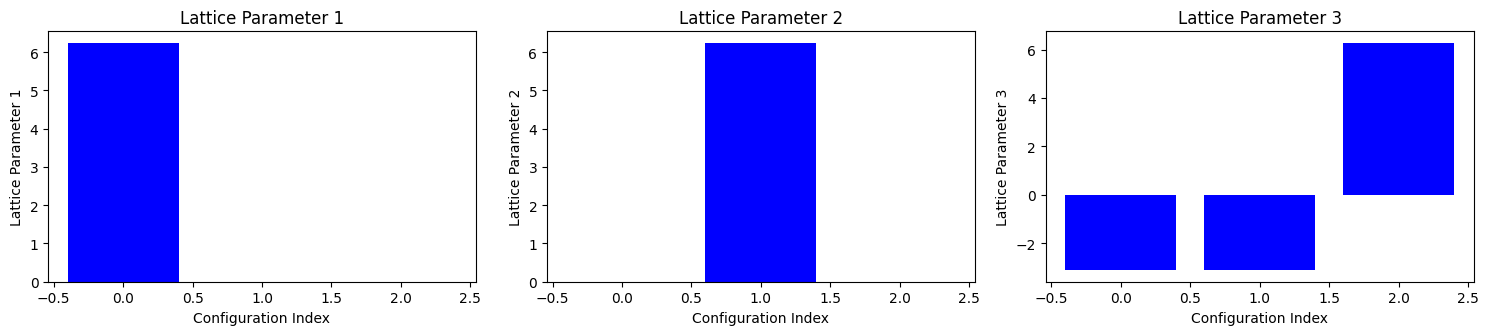

In [31]:
import matplotlib.pyplot as plt
# Convert to a transposed list to plot each lattice parameter
def plot_lattice(entry):
    lattice_params = entry.structure.lattice.matrix
    #lattice_params_transposed = list(map(list, zip(*lattice_params)))

    # Plotting the bar chart for each lattice parameter
    plt.figure(figsize=(15, 10))
    for i, params in enumerate(lattice_params):
        plt.subplot(3, 3, i+1)
        plt.bar(range(len(params)), params, color='blue')
        plt.xlabel('Configuration Index')
        plt.ylabel(f'Lattice Parameter {i+1}')
        plt.title(f'Lattice Parameter {i+1}')

    #plt.suptitle(f'Lattice Parameters for Each Configuration in {file_name}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
plot_lattice(entries[3])

In [14]:
for i in range(2):
    display(entries[3].structure.lattice)

Lattice
    abc : 6.23096541 6.23096541 7.673335689665414
 angles : 113.95469325121333 113.95469325121333 90.0
 volume : 243.91085361363707
      A : 6.23096541 0.0 0.0
      B : 0.0 6.23096541 0.0
      C : -3.1154827 -3.1154827 6.28232566
    pbc : True True True

Lattice
    abc : 6.23096541 6.23096541 7.673335689665414
 angles : 113.95469325121333 113.95469325121333 90.0
 volume : 243.91085361363707
      A : 6.23096541 0.0 0.0
      B : 0.0 6.23096541 0.0
      C : -3.1154827 -3.1154827 6.28232566
    pbc : True True True

In [ ]:
for file_name in files:
    file_path = os.path.join(directory_path, file_name)
    atoms_list = ase.io.read(file_path, index=':')
    
    # Extract all lattice parameters
    lattice_params = [atoms.cell.flatten() for atoms in atoms_list]
    
    # Convert to a transposed list to plot each lattice parameter
    lattice_params_transposed = list(map(list, zip(*lattice_params)))
    
    # Plotting the bar chart for each lattice parameter
    plt.figure(figsize=(15, 10))
    for i, params in enumerate(lattice_params_transposed):
        plt.subplot(3, 3, i+1)
        plt.bar(range(len(params)), params, color='blue')
        plt.xlabel('Configuration Index')
        plt.ylabel(f'Lattice Parameter {i+1}')
        plt.title(f'Lattice Parameter {i+1}')
    
    plt.suptitle(f'Lattice Parameters for Each Configuration in {file_name}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
